In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
#pip install fastai

In [8]:
PATH="./dataset_binary/"
bs = 16  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size

In [9]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  2 classes:
 ['normal', 'abnormal']


In [10]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: normal


Class: abnormal


In [11]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [12]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 734 training images and 183 validation images.


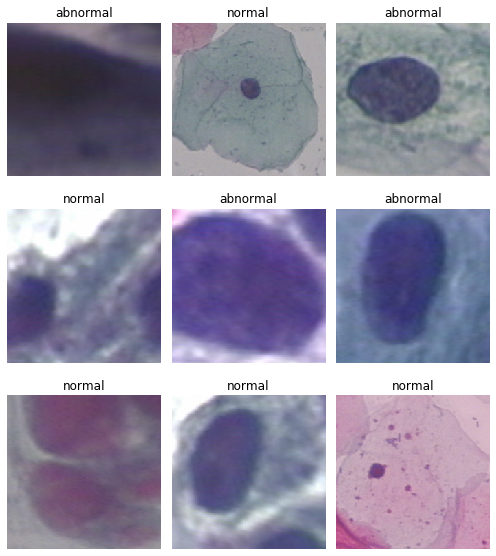

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [18]:
learn.lr_find();
learn.recorder.plot()

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 1.96 GiB total capacity; 1.27 GiB already allocated; 512.00 KiB free; 40.96 MiB cached)